In [1]:
import os
import random
import cv2
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib as mpl
from tqdm import tqdm
from colorama import Fore, Style
import exifread

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Set the font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

%matplotlib inline

folder_path = '../data/raw/'


Text(0.5, 1.0, 'Cropped Image')

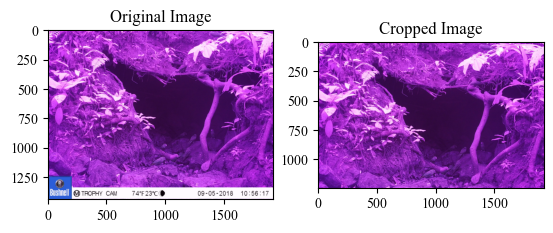

In [8]:
# Function to remove the watermarks
def bottom_crop(img):
    # Read image
    img = cv2.imread(img)

    # Find height
    img_size = img.shape
    img_height = img_size[0]

    # Watermark size depends on the size of the image. Manually found these dimensions
    if img_height == 1440:
        bottom_crop = img_height - 200
        
    else:
        bottom_crop = img_height - 240

    # Cropping
    img = img[0:bottom_crop, 0:img_size[1]]

    # Return image
    return img

image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]

# Test on a random image
random_image = random.choice(image_files)
random_image_path = os.path.join(folder_path, random_image)
initial_image = cv2.imread(random_image_path)
test_img = bottom_crop(random_image_path)
fig, axs = plt.subplots(1,2)
axs[0].imshow(initial_image)
axs[0].set_title("Original Image")
axs[1].imshow(test_img)
axs[1].set_title("Cropped Image")

In [9]:
# Should exist from git clone. Make it if you need
folder_path = '../data/raw/'

image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]
random_images = random.sample(image_files, 500)  # Randomly select 500 images

# Making folder if it doesn't exist yet
cropped_folder = '../data/processed/cropped/'
if not (os.path.exists(cropped_folder)):
    os.mkdir(cropped_folder)

for filename in tqdm(image_files, desc="Cropping images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}", colour="#336699", ncols=75):
    image_path = os.path.join(folder_path, filename)
    cropped_image = bottom_crop(image_path)
    output_path = cropped_folder + filename

    cv2.imwrite(output_path, cropped_image)

Cropping images: 100%|██████████████████████████████████████████| 6000/6000


Text(0.5, 1.0, 'Cropped Image')

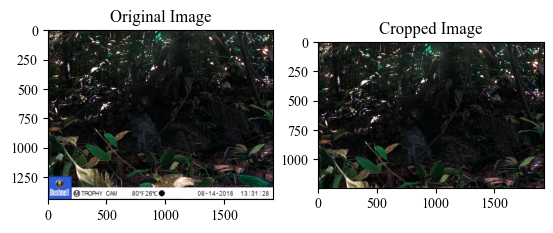

In [13]:
# Test to be sure it worked
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]

random_image = random.choice(image_files)
random_image_path = os.path.join(folder_path, random_image)
initial_image = cv2.imread(random_image_path)

cropped_image_path = os.path.join(cropped_folder, random_image)
cropped_image = cv2.imread(cropped_image_path)
fig, axs = plt.subplots(1,2)
axs[0].imshow(initial_image)
axs[0].set_title("Original Image")
axs[1].imshow(cropped_image)
axs[1].set_title("Cropped Image")

ORIGINAL IMAGE SHAPE: (1240, 1920, 3)
PADDED IMAGE SHAPE: (1920, 1920, 3)
DESIRED SHAPED: [1920, 1920]


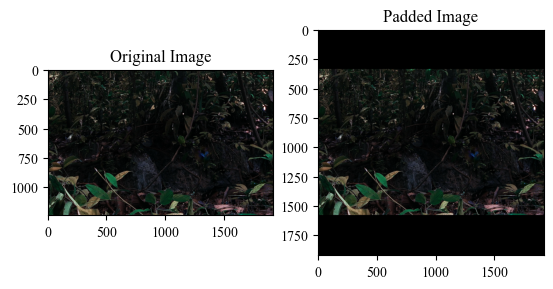

In [52]:
cropped_images = [file for file in os.listdir(cropped_folder) if file.endswith('.jpg') or file.endswith('.png')]

from PIL import Image, ImageOps

# Padding function
def padding(img, expected_size):
    desired_size = expected_size
    # Differences
    delta_height = desired_size[0] - img.shape[0]
    delta_width = desired_size[1] - img.shape[1]

    # Amount to add to each side
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    
    # Add padding
    return cv2.copyMakeBorder(img, top=pad_height, bottom=pad_height, left=pad_width, right=pad_width, borderType = cv2.BORDER_CONSTANT)

# Test on random image
random_image = random.choice(cropped_images)
random_image_path = os.path.join(cropped_folder, random_image)
initial_image = cv2.imread(random_image_path)
initial_image_size = initial_image.shape
square_length = max(initial_image_size[0], initial_image_size[1])
padded_size = [square_length, square_length]
padded_image = padding(initial_image, padded_size)

# Display
fig, axs = plt.subplots(1,2)
axs[0].imshow(initial_image)
axs[0].set_title("Original Image")
axs[1].imshow(padded_image)
axs[1].set_title("Padded Image")
print("ORIGINAL IMAGE SHAPE:", initial_image.shape)
print("PADDED IMAGE SHAPE:", padded_image.shape)
print("DESIRED SHAPED:", padded_size)

In [61]:
padded_image_folder = '../data/processed/padded/'

# Making folder if it doesn't exist yet
if not (os.path.exists(padded_image_folder)):
    os.mkdir(padded_image_folder)
    
cropped_images = [file for file in os.listdir(cropped_folder) if file.endswith('.jpg') or file.endswith('.png')]
random_images = random.sample(cropped_images, 500)  # Randomly select 500 images


for filename in tqdm(cropped_images, desc="Padding Images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}", colour="#336699", ncols=75):
    image_path = os.path.join(cropped_folder, filename)
    img = cv2.imread(image_path)

    # Finding its shape
    initial_image_size = img.shape

    # Making it a square with the length of its previous largest dimension
    square_length = max(initial_image_size[0], initial_image_size[1])
    padded_size = [square_length, square_length]

    # padding
    padded_img = padding(img, padded_size)

    # Write image
    output_path = padded_image_folder + filename
    cv2.imwrite(output_path, padded_img)

Padding Images: 100%|███████████████████████████████████████████| 6000/6000


PADDED IMAGE SHAPE: (1920, 1920, 3)


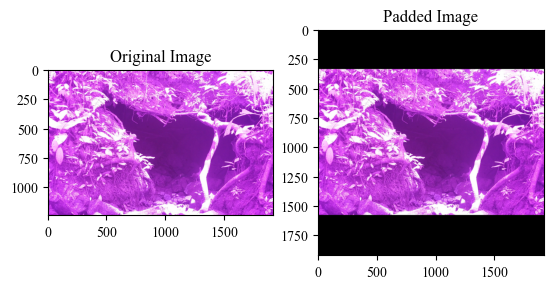

In [64]:
# Test to be sure it worked
cropped_images = [file for file in os.listdir(cropped_folder) if file.endswith('.jpg') or file.endswith('.png')]
padded_image_folder = '../data/processed/padded/'

random_cropped_image = random.choice(cropped_images)
random_cropped_image_path = os.path.join(cropped_folder, random_cropped_image)
cropped_image = cv2.imread(random_cropped_image_path)

padded_image_path = os.path.join(padded_image_folder, random_cropped_image)
padded_image = cv2.imread(padded_image_path)
fig, axs = plt.subplots(1,2)
axs[0].imshow(cropped_image)
axs[0].set_title("Original Image")
axs[1].imshow(padded_image)
axs[1].set_title("Padded Image")
print("PADDED IMAGE SHAPE:", padded_image.shape)

ORIGINAL IMAGE SHAPE: (1920, 1920, 3)
PADDED IMAGE SHAPE: (416, 416, 3)
DESIRED SHAPED: (416, 416)


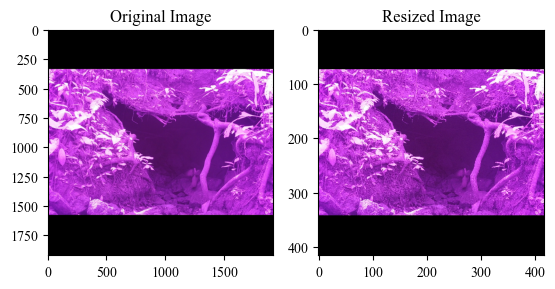

In [65]:
padded_images = [file for file in os.listdir(padded_image_folder) if file.endswith('.jpg') or file.endswith('.png')]


def img_resize(image, resize_shape):
    resized_image = cv2.resize(image, resize_shape, interpolation=cv2.INTER_NEAREST)
    return resized_image


# Test on random image
random_image = random.choice(padded_images)
random_image_path = os.path.join(padded_image_folder, random_image)
initial_image = cv2.imread(random_image_path)
initial_image_shape = initial_image.shape

# YOLO Size dimensions
desired_shape = (416, 416)
resized_image = img_resize(initial_image, desired_shape)

# Display
fig, axs = plt.subplots(1,2)
axs[0].imshow(initial_image)
axs[0].set_title("Original Image")
axs[1].imshow(resized_image)
axs[1].set_title("Resized Image")
print("ORIGINAL IMAGE SHAPE:", initial_image.shape)
print("PADDED IMAGE SHAPE:", resized_image.shape)
print("DESIRED SHAPED:", desired_shape)

In [69]:
resized_image_folder = '../data/processed/resized/'

# Making folder if it doesn't exist yet
if not (os.path.exists(resized_image_folder)):
    os.mkdir(resized_image_folder)
    
padded_images = [file for file in os.listdir(padded_image_folder) if file.endswith('.jpg') or file.endswith('.png')]
random_images = random.sample(padded_images, 500)  # Randomly select 500 images


for filename in tqdm(padded_images, desc="Padding Images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}", colour="#336699", ncols=75):
    image_path = os.path.join(padded_image_folder, filename)
    img = cv2.imread(image_path)
    
    # YOLO size dimensions
    desired_shape = (416, 416)

    resized_image = img_resize(img, desired_shape)

    # Write image
    output_path = resized_image_folder + filename
    cv2.imwrite(output_path, resized_image)

Padding Images: 100%|███████████████████████████████████████████| 6000/6000


ORIGINAL IMAGE SHAPE: (1920, 1920, 3)
RESIZED IMAGE SHAPE: (416, 416, 3)
DESIRED SHAPED: (416, 416)


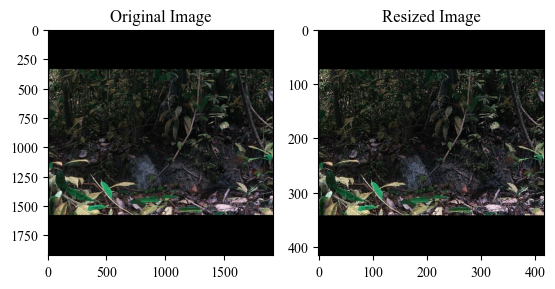

In [70]:
# Test to be sure it worked
padded_images = [file for file in os.listdir(padded_image_folder) if file.endswith('.jpg') or file.endswith('.png')]
resized_image_folder = '../data/processed/resized/'

random_padded_image = random.choice(padded_images)
random_padded_image_path = os.path.join(padded_image_folder, random_padded_image)
padded_image = cv2.imread(random_padded_image_path)

resized_image_path = os.path.join(resized_image_folder, random_padded_image)
resized_image = cv2.imread(resized_image_path)
fig, axs = plt.subplots(1,2)
axs[0].imshow(padded_image)
axs[0].set_title("Original Image")
axs[1].imshow(resized_image)
axs[1].set_title("Resized Image")
print("ORIGINAL IMAGE SHAPE:", padded_image.shape)
print("RESIZED IMAGE SHAPE:", resized_image.shape)
print("DESIRED SHAPED:", desired_shape)